In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import os
import webbrowser




In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/xenon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
apps_df = pd.read_csv('Play Store Data.csv')
reviews_df = pd.read_csv('User Reviews.csv')

In [4]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
#data cleaning
apps_df =apps_df.dropna(subset=['Rating'])
for column in apps_df.columns:
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df=apps_df=apps_df[apps_df['Rating']<=5]

reviews_df =reviews_df.dropna(subset=['Translated_Review'],inplace=True)

In [12]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
#removing commos and plus in install colm
apps_df['Installs']=apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)

#removing $ symbol from price
apps_df['Price']=apps_df['Price'].str.replace('$','').astype(float)

In [13]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
print(apps_df is None)  # Should return False
print(reviews_df is None)  # Should return False


False
True


In [16]:
# Check if reviews_df is None
if reviews_df is None:
    print("reviews_df is not initialized or loaded correctly.")

# If reviews_df was supposed to come from a file
try:
    reviews_df = pd.read_csv("path_to_reviews_file.csv")  # Replace with the actual file path
    print("Successfully loaded reviews_df:")
    print(reviews_df.head())
except FileNotFoundError:
    print("The file for reviews_df was not found. Check the file path.")
except Exception as e:
    print("An error occurred while loading reviews_df:", e)


reviews_df is not initialized or loaded correctly.
The file for reviews_df was not found. Check the file path.


In [17]:
import os
print(os.path.exists("User Reviews.csv"))  # Should return True


True


In [18]:
reviews_df = pd.read_csv("User Reviews.csv")  # Update with your file/source
print(reviews_df.head())  # Check the first few rows


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [19]:
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')
print(merged_df.head())


                   App        Category  Rating Reviews Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9     967  14M    500000  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9     967  14M    500000  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9     967  14M    500000  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9     967  14M    500000  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9     967  14M    500000  Free   

   Price Content Rating                     Genres      Last Updated  \
0    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4    0.0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   

In [20]:
merged_df.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                    int64
Type                       object
Price                     float64
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [21]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [24]:
import numpy as np

# Function to convert size
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan  # Handle unexpected/unknown sizes

# Apply the function to the 'Size' column
apps_df['Size'] = apps_df['Size'].apply(convert_size)


In [25]:
print(apps_df['Size'].head())


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [26]:
#log transformation
apps_df['Log_Installs']=np.log1p(apps_df['Installs'])
#apps_df['Log_Reviews']=np.log1p(apps_df['Reviews'])

In [29]:
apps_df['Reviews']=apps_df['Reviews'].astype(int)

In [30]:
apps_df['Log_Reviews']=np.log1p(apps_df['Reviews'])

In [31]:
def rating_group(rating):
    if rating >= 4:
        return 'Top Rated App'
    elif rating >= 3:
        return 'Above Average'
    elif rating >= 2:
        return 'Average'
    else:
        return 'Below Average'
    
apps_df['Rating_Group']=apps_df['Rating'].apply(rating_group)    

In [32]:
#revenue colm
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']

In [33]:
#sentimental analysis
sia = SentimentIntensityAnalyzer()



In [36]:
reviews_df['Sentiment_Score']=reviews_df['Translated_Review'].apply(lambda x:sia.polarity_scores(str(x))['compound'])

In [37]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
2,10 Best Foods for You,NaN,NaN,NaN,NaN,0.0000
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369


In [39]:
apps_df['Last Updated']=pd.to_datetime(apps_df['Last Updated'],errors='coerce')

In [40]:
apps_df['Year']=apps_df['Last Updated'].dt.year

In [41]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210440,5.075174,Top Rated App,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122365,6.875232,Above Average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424949,11.379520,Top Rated App,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281389,Top Rated App,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512935,6.875232,Top Rated App,0.0,2018


In [42]:
#plotting
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedir(html_file_path)

In [43]:
plot_containers=""

In [45]:
def save_plot_as_html(fig,filename,insights):
    global plot_containers
    filepath=os.path.join(html_files_path,filename)
    html_content=pio.to_html(fig,full_html=False,include_plotlyjs='inline')
    plot_containers += f"""
    <div class ="plot-container" id="{filename}')" onclick="openPlot('{filename}')">
        <div class="plot"> {html_content} </div> 
        <div class = "insight"> {insights} </div> 
        </div> 
        """
    fig.write_html(filepath,full_html=False,include_plotlyjs='inline')

In [46]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}
 

In [75]:
#fig1
category_counts=apps_df['Category'].value_counts().nlargest(10)
fig1=px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)
    
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig1,"Category Graph 1.html","The Top Categories on the Play Store are dominated by tools,entertainment,and productivity apps")
    

In [76]:
#fig2
type_counts=apps_df['Type'].value_counts()
fig=px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
    
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on the Play Store are free ,indicating a strategy to attract users first and monetize thorugh ads")



In [55]:
#fig3 
fig3=px.histogram(
    apps_df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)
    
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig3,"Rating Graph 3.html","Rating are skewed towards higher values,suggesting that most apps are rated favorably by users")



In [56]:
#fig4
sentiment_counts=reviews_df['Sentiment_Score'].value_counts()
fig4=px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'Sentiment Score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)
    
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig4,"Sentiment Graph 1.html"," Sentiments in reviews shows a mix of positive and negative ,with a slight lean toward positive sentiments")


In [57]:
#fig5
installs_by_category=apps_df.groupby('Category')['Installs'].sum().nlargest(10)
fig5=px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x':'Installs','y':'Category'},
    title='Installs by Category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)
    
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig5,"Installs Graph 5.html","The categories with the most installs are social and communication apps, reflecting their broad appeal daily.")



In [62]:
#fig6
updates_per_year=apps_df['Last Updated'].dt.year.value_counts().sort_index()
fig6=px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    labels={'x':'Year','y':'Number of Updates'},
    title='Number of Updates over the Years',
    color_discrete_sequence=['#AB63FA'],
    width=400,
    height=300
)
    
fig6.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig6,"Updates Graph 6.html","Updates have been increasing over the years, showing that developers are actively maintaining and improving their apps ")


In [63]:
#fig7
revenue_by_category=apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
fig7=px.bar(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue by Category',
    color=revenue_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)
    
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(marker=dict(line=dict(color='white',width=1))))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as Business and Productivity lead in revenue generation indicating their monetization potential ")


In [64]:
#fig8

genre_count=apps_df['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8=px.bar(
    x=genre_count.index,
    y=genre_count.values,
    labels={'x':'Genre','y':'Count'},
    title='Top Genre',
    color=revenue_by_category.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)
    
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)


save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual genres are the most common, reflecting users preference for engaging and easy to play games ")


In [65]:
#fig9

fig9=px.scatter(
    apps_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of Last Update on Rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)
    
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)


save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update and ratings, suggesting that more frequent updates dont always result in better ratings.")


In [66]:
#fig10
fig10=px.box(
    apps_df,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Free Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)
    
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)


save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps generally have higher rating compare to free apps, suggesting that user expect higher quality from the apps they pay for.")


In [67]:
plot_containers_split=plot_containers.split('</div>')

In [68]:
if len(plot_containers_split) > 1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [69]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """

In [70]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [71]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [72]:
with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(final_html)

In [73]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True

In [5]:
import ssl
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/xenon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:10])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [10]:
print(all_reviews)
print(len(all_reviews))  # Should not be 0
print(filtered_reviews.head())




0
Empty DataFrame
Columns: [App, Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity]
Index: []


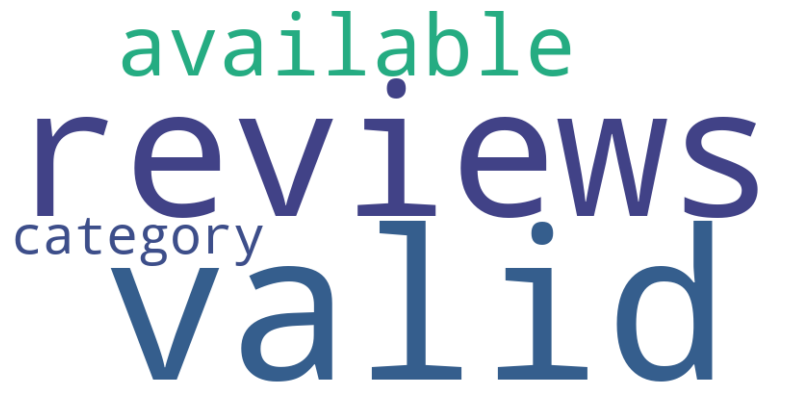

In [13]:
# Combine reviews into a single string
all_reviews = " ".join(filtered_reviews['Translated_Review'])

# Ensure non-empty reviews
if not all_reviews.strip():
    all_reviews = "No valid reviews available for this category"

# Generate the word cloud
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=100,
    colormap='viridis',
    width=800,
    height=400
).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [18]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
all_reviews = " ".join(reviews_df['Translated_Review'].dropna().astype(str))


In [20]:
if all_reviews.strip():  # Check if reviews are not empty
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color='white',
        max_words=100,
        width=800,
        height=400
    ).generate(all_reviews)


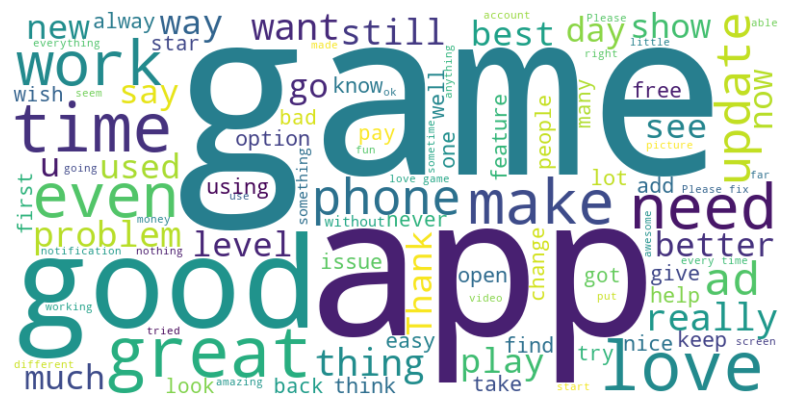

In [33]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Step 1: Load the dataset
#reviews_df = pd.read_csv('path_to_dataset.csv')

# Step 2: Combine all reviews into a single string
all_reviews = " ".join(reviews_df['Translated_Review'].dropna().astype(str))

# Step 3: Generate the WordCloud
if all_reviews.strip():  # Check if reviews are not empty
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color='white',
        max_words=100,
        width=800,
        height=400
    ).generate(all_reviews)

    wordcloud.to_file("wordcloud_image.png")

    # Step 4: Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No valid reviews to generate a WordCloud.")
